In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('house_prices.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3.shape

(13246, 5)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
def convert_string_size_to_int_size(x):
    tokens = x.split(' ')
    return int(tokens[0])

In [10]:
# df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
# df3
df3['bhk'] = df3['size'].apply(convert_string_size_to_int_size)

<ipython-input-10-0e4b19c14904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(convert_string_size_to_int_size)


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [18]:
df4 = df4.dropna()

In [19]:
df4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [22]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
len(df5['location'].unique())

1298

In [24]:
df5.location = df5.location.apply(lambda x : x.strip()) 
location_state = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_state

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [25]:
len(location_state[location_state <= 10])

1047

In [26]:
location_state_less_than_10 = location_state[location_state <= 10]
location_state_less_than_10 

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [27]:
len(df5.location.unique())

1287

In [28]:
def other_category(x):
    if x in location_state_less_than_10:
        return 'other'
    else:
        return x

In [29]:
df5['location'] = df5['location'].apply(other_category)
len(df5.location.unique())

241

In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df5.shape

(13200, 7)

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [33]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
for key, subdf in df6.groupby('location'):
        print(subdf)

                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818  
85

13177  Bharathi Nagar  2 BHK      1379.0   2.0   85.00    2     6163.886875
          location   size  total_sqft  bath   price  bhk  price_per_sqft
51     Bhoganhalli  3 BHK      1670.0   3.0   99.00    3     5928.143713
811    Bhoganhalli  4 BHK      2119.0   4.0  111.00    4     5238.319962
1427   Bhoganhalli  3 BHK      1410.0   3.0   65.00    3     4609.929078
1499   Bhoganhalli  2 BHK       804.1   2.0   69.09    2     8592.214899
1970   Bhoganhalli  3 BHK      1718.0   3.0   90.20    3     5250.291036
2465   Bhoganhalli  2 BHK      1444.0   2.0   75.97    2     5261.080332
2571   Bhoganhalli  2 BHK      1447.0   2.0   75.97    2     5250.172771
2824   Bhoganhalli  3 BHK      1700.0   3.0  126.00    3     7411.764706
3424   Bhoganhalli  4 BHK      1451.5   4.0  121.00    4     8336.203927
3671   Bhoganhalli  2 BHK      1447.0   2.0   75.97    2     5250.172771
4288   Bhoganhalli  3 BHK      1053.4   3.0   88.91    3     8440.288589
4620   Bhoganhalli  2 BHK       910.2   2.0   80

      location       size  total_sqft  bath   price  bhk  price_per_sqft
66      Gunjur      2 BHK      1140.0   2.0   43.00    2     3771.929825
890     Gunjur      3 BHK      1356.0   2.0   66.00    3     4867.256637
1708    Gunjur      3 BHK      1600.0   3.0   75.00    3     4687.500000
3121    Gunjur  4 Bedroom      2000.0   3.0   95.00    4     4750.000000
3173    Gunjur      2 BHK      1140.0   2.0   49.11    2     4307.894737
3856    Gunjur      2 BHK      1195.0   2.0   44.00    2     3682.008368
4383    Gunjur      2 BHK      1190.0   2.0   40.00    2     3361.344538
4816    Gunjur      2 BHK      1457.0   2.0   60.00    2     4118.050789
5181    Gunjur  5 Bedroom      6613.0   7.0  950.00    5    14365.643430
5452    Gunjur      2 BHK      1080.0   2.0   41.00    2     3796.296296
7034    Gunjur      3 BHK      2132.0   3.0   80.00    3     3752.345216
7469    Gunjur      3 BHK      1800.0   3.0   70.00    3     3888.888889
7965    Gunjur      2 BHK      1175.0   2.0   43.48

[262 rows x 7 columns]
           location       size  total_sqft  bath   price  bhk  price_per_sqft
151    Kannamangala      2 BHK       957.0   2.0   58.00    2     6060.606061
1276   Kannamangala      2 BHK       957.0   2.0   56.00    2     5851.619645
1380   Kannamangala      3 BHK      1550.0   3.0   65.00    3     4193.548387
2309   Kannamangala  4 Bedroom      3000.0   4.0  200.00    4     6666.666667
2550   Kannamangala      2 BHK      1235.0   2.0   43.63    2     3532.793522
2601   Kannamangala      3 BHK      1536.0   3.0   89.00    3     5794.270833
3574   Kannamangala      2 BHK      1262.0   2.0   55.00    2     4358.161648
3639   Kannamangala  4 Bedroom      2400.0   4.0  130.00    4     5416.666667
3968   Kannamangala      3 BHK      1574.0   3.0   93.34    3     5930.114358
6487   Kannamangala      2 BHK       957.0   2.0   52.50    2     5485.893417
8262   Kannamangala      3 BHK      1536.0   3.0  104.00    3     6770.833333
8526   Kannamangala      2 BHK       957.

         location       size  total_sqft  bath  price  bhk  price_per_sqft
1272   Pai Layout      2 BHK      1006.0   2.0   35.0    2     3479.125249
2534   Pai Layout      3 BHK      1550.0   2.0   90.0    3     5806.451613
2729   Pai Layout      2 BHK      1050.0   2.0   40.0    2     3809.523810
3061   Pai Layout      3 BHK      1400.0   2.0   67.0    3     4785.714286
3788   Pai Layout      2 BHK      1100.0   2.0   50.0    2     4545.454545
3988   Pai Layout      2 BHK      1255.0   2.0   80.0    2     6374.501992
4471   Pai Layout      2 BHK      1075.0   2.0   35.0    2     3255.813953
6517   Pai Layout      2 BHK      1400.0   2.0   57.5    2     4107.142857
6901   Pai Layout      2 BHK      1175.0   2.0   60.0    2     5106.382979
7223   Pai Layout      2 BHK       810.0   2.0   34.5    2     4259.259259
8143   Pai Layout  2 Bedroom       780.0   2.0   72.0    2     9230.769231
8735   Pai Layout      2 BHK      1000.0   2.0   34.0    2     3400.000000
10716  Pai Layout      2 

             location       size  total_sqft  bath  price  bhk  price_per_sqft
842    Yelachenahalli      3 BHK      1400.0   2.0   55.0    3     3928.571429
1059   Yelachenahalli      3 BHK      1464.0   2.0  105.0    3     7172.131148
1576   Yelachenahalli      2 BHK      2400.0   1.0  150.0    2     6250.000000
1870   Yelachenahalli  4 Bedroom      1800.0   3.0  220.0    4    12222.222222
1987   Yelachenahalli      3 BHK      1700.0   3.0  130.0    3     7647.058824
2930   Yelachenahalli      2 BHK      1130.0   2.0   40.0    2     3539.823009
3629   Yelachenahalli      2 BHK      1080.0   2.0   55.0    2     5092.592593
4157   Yelachenahalli      2 BHK      1400.0   2.0   78.0    2     5571.428571
4983   Yelachenahalli      2 BHK      1080.0   2.0   38.0    2     3518.518519
6553   Yelachenahalli      3 BHK      1330.0   3.0   73.5    3     5526.315789
6812   Yelachenahalli      2 BHK       800.0   1.0   30.0    2     3750.000000
7385   Yelachenahalli      2 BHK      1100.0   2.0  

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df6)

In [36]:
df6.shape

(10242, 7)

Text(0, 0.5, 'Count')

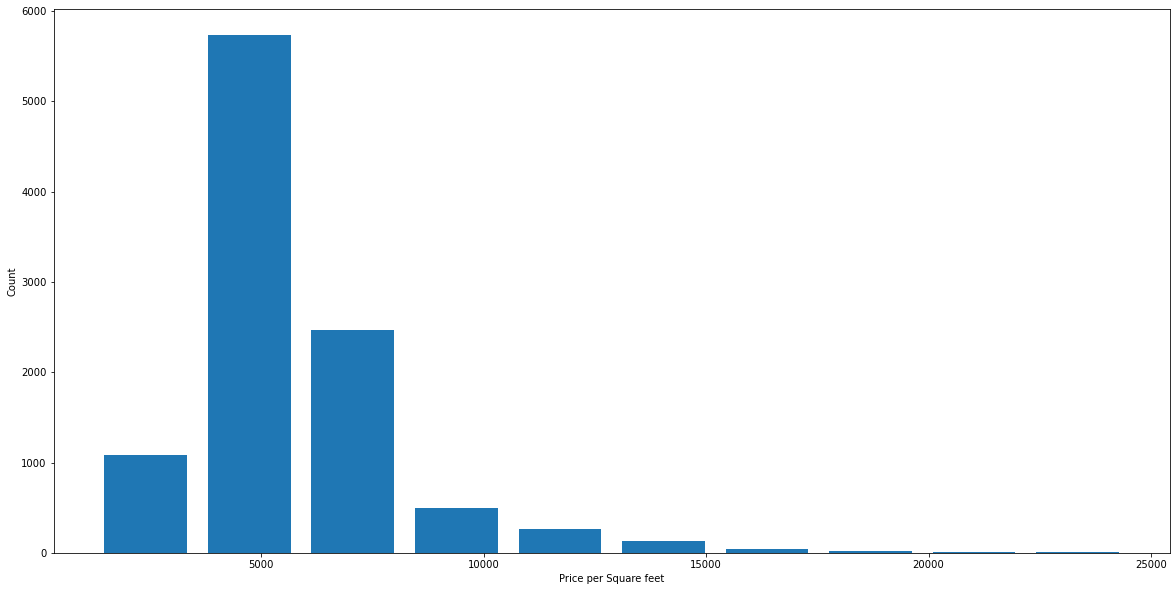

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Square feet')
plt.ylabel("Count")

In [38]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

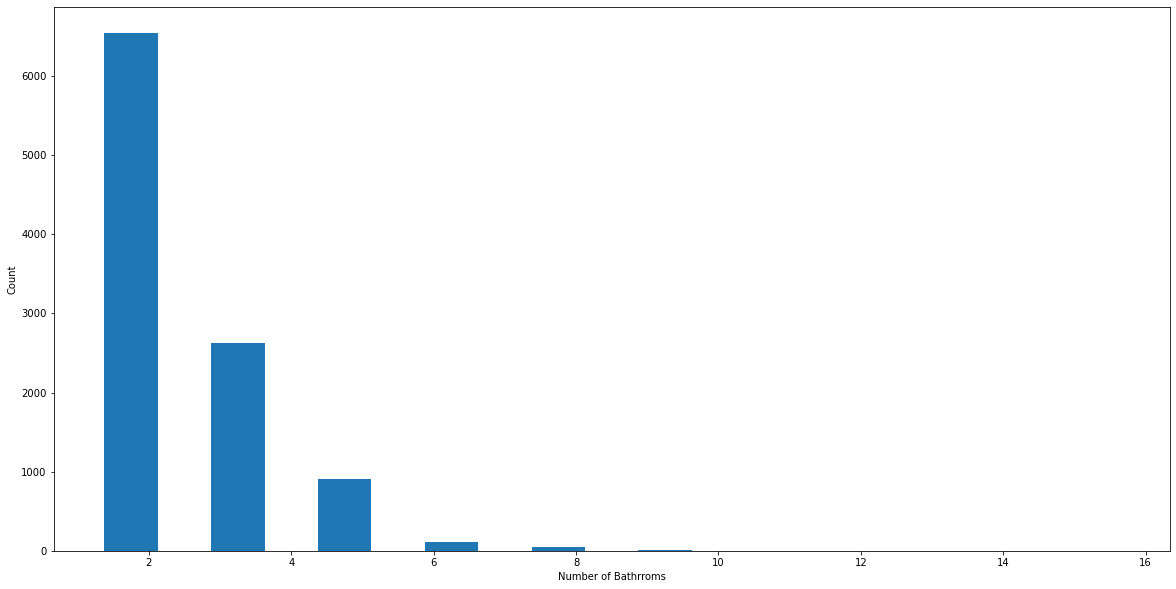

In [39]:
plt.hist(df6.bath,rwidth = 0.5)
plt.xlabel('Number of Bathrroms')
plt.ylabel("Count")

In [40]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [41]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(10148, 7)

In [42]:
df8 = df7.drop(['size','price_per_sqft'],axis = 1)
df8.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
7,1st Phase JP Nagar,2825.0,4.0,250.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5


In [43]:
dummies = pd.get_dummies(df8.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df9 = pd.concat([df8,dummies.drop('other',axis=1)],axis = 1)
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df10 = df9.drop(['location'],axis = 1)
df10.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10.shape

(10148, 244)

In [47]:
x = df10.drop(['price'],axis = 1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y = df10['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8022447295303519

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv =cv)

array([0.81567128, 0.87002069, 0.80226713, 0.82194915, 0.7501478 ,
       0.82243754, 0.81016488, 0.77715581, 0.76274803, 0.85271794])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [53]:
algos = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'fit_intercept' : [True,False],
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2,10,100],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}

In [54]:
scores = []
best_estimators = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv)
    gs.fit(x,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_,
    })
    
    best_estimators[algo_name] = gs.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,linear_regression,0.812011,"{'fit_intercept': True, 'normalize': True}"
1,lasso,0.673081,"{'alpha': 100, 'selection': 'random'}"
2,decision_tree,0.679971,"{'criterion': 'mse', 'splitter': 'random'}"


In [55]:
best_estimators

{'linear_regression': LinearRegression(normalize=True),
 'lasso': Lasso(alpha=100, selection='random'),
 'decision_tree': DecisionTreeRegressor(splitter='random')}

In [56]:
best_estimators['linear_regression'].score(x_test,y_test)

0.8107822888581846

In [57]:
best_estimators['lasso'].score(x_test,y_test)

0.7068749342513247

In [58]:
best_estimators['decision_tree'].score(x_test,y_test)

0.9675979409493979

In [59]:
def predict_price(total_sqft,bath,bhk,location):    
    loc_index = np.where(x.columns==location)[0]

    x_var = np.zeros(len(x.columns))
    x_var[0] = total_sqft
    x_var[1] = bath
    x_var[2] = bhk
    if loc_index >= 0:
        x_var[loc_index] = 1

    return reg.predict([x_var])

In [60]:
predict_price(1000, 2, 2,'1st Phase JP Nagar')

array([83.79853459])

In [61]:
predict_price(1000, 2, 3,'1st Phase JP Nagar')

array([77.81208713])

In [62]:
predict_price(1000, 2, 3,'Indira Nagar')

array([159.10074156])

In [63]:
predict_price(1000, 3, 3,'Indira Nagar')

array([167.4045869])

In [64]:
import pickle
with open('house_prices_Prediction_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.jason",'w') as f:
    json.dump(columns,f)